# We draw a 3D surface plot to visualize the accuracy scores at different malaria parasitemia with range of hematoctrits concetration of Normal to severe anamia

In [50]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import rcParams

sns.set(context="paper",

    style="white",

    font_scale=2.0,
        
    rc={"font.family": "sans-serif"})

rcParams['font.sans-serif'] = 'Arial'

In [51]:
df = pd.read_csv("3D_Plot_All_accuracy_anemia_and _malaria.csv") # this was avaraged by parasitemia and hematocrits from validations scripts
df

,Anemic_condition,Parasitemia,Model,Accuracy,LCI,UCI
0,50.0,6.00000,Model 1 (High Contrast),100.00,NaN,NaN
1,50.0,0.10000,Model 1 (High Contrast),100.00,NaN,NaN
2,50.0,0.00200,Model 1 (High Contrast),91.00,87.0,95.0
3,50.0,0.00003,Model 1 (High Contrast),92.00,88.0,96.0
4,25.0,6.00000,Model 1 (High Contrast),100.00,NaN,NaN
5,25.0,0.10000,Model 1 (High Contrast),100.00,NaN,NaN
6,25.0,0.00200,Model 1 (High Contrast),95.00,92.0,98.0
7,25.0,0.00003,Model 1 (High Contrast),95.00,92.0,97.0
8,12.5,6.00000,Model 1 (High Contrast),97.00,94.0,98.0
9,12.5,0.10000,Model 1 (High Contrast),96.00,93.0,98.0


<ipython-input-53-d8197b7897bd>:50: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(global_min_accuracy, global_max_accuracy)


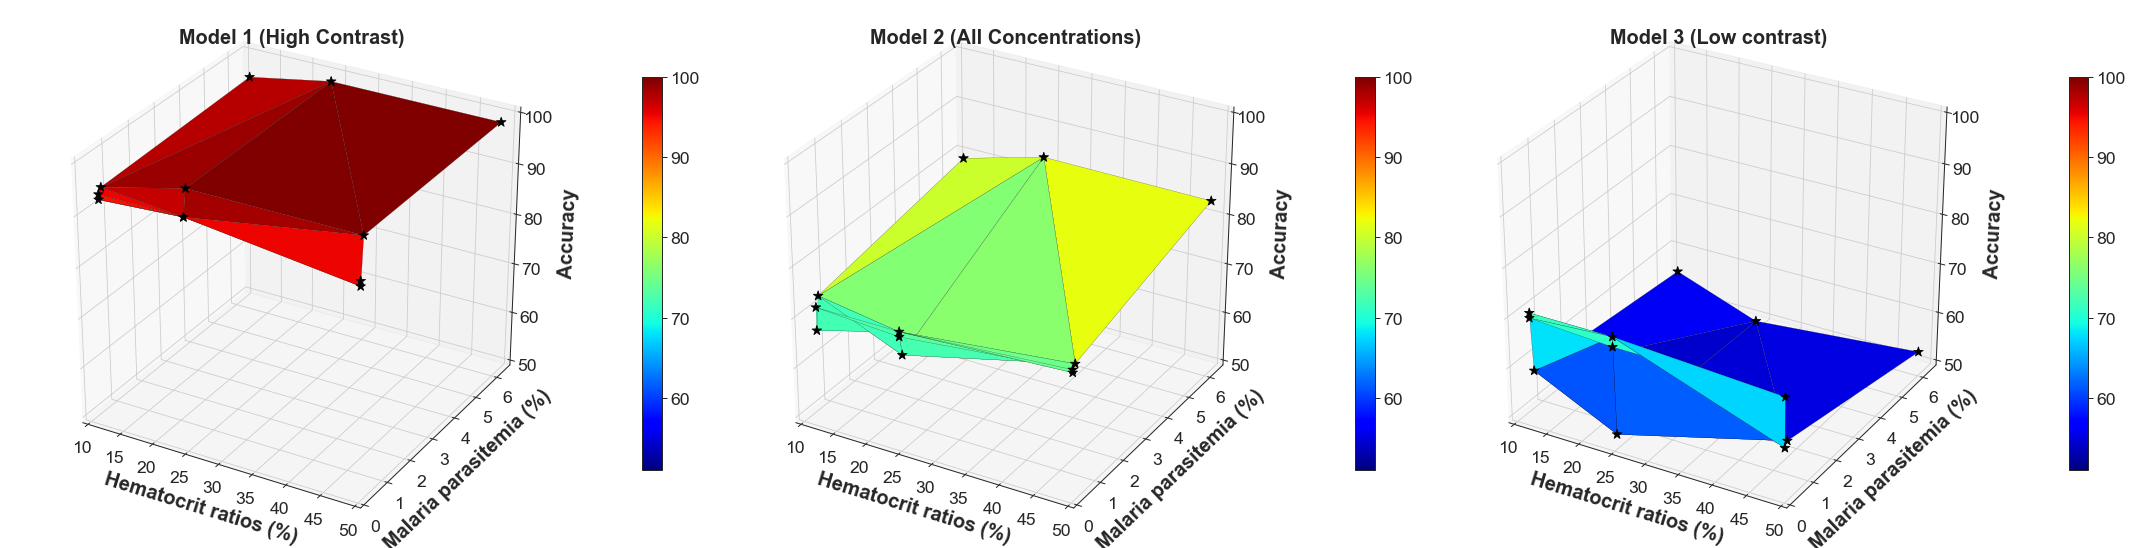

In [53]:
# First, look for overall minimum and maximum accuracy values as this will define our colorbar

global_min_accuracy = df['Accuracy'].min()
global_max_accuracy = df['Accuracy'].max()

fig = plt.figure(figsize=(30, 8)) # figure size

# Iterate per each model (training approach) either, High contrast,All concentrations or Low contrast
for idx, model in enumerate(df['Model'].unique()):
    # Create a 3D subplot
    ax = fig.add_subplot(1, 3, idx + 1, projection='3d')
    
    # Filter data for the current model
    model_data = df[df['Model'] == model]

    # Then, plotting the 3D surface with a color bar
    surf = ax.plot_trisurf(model_data['Anemic_condition'],model_data['Parasitemia'], model_data['Accuracy'],
                           linewidth=0.2, antialiased=True, cmap=plt.cm.jet, edgecolor='k', 
                           vmin=global_min_accuracy, vmax=global_max_accuracy)
    
    ax.scatter(model_data['Anemic_condition'], model_data['Parasitemia'], model_data['Accuracy'], c='black', s=100, marker='*',alpha=1)
    
    # Customize the plot
    ax.set_xlabel('Hematocrit ratios (%)', labelpad=10, weight='bold', fontsize=20)
    ax.set_ylabel('Malaria parasitemia (%)',  labelpad=10, weight='bold', fontsize=20)
    ax.set_zlabel('Accuracy',  labelpad=15, weight='bold', fontsize=20)
    ax.set_title(model, weight='bold',fontsize=20)
    ax.set_xlim([10, 50])
    ax.set_zlim([50, 100])
    ax.set_ylim([0, 6.5])
    
    # Add colorbar per each 3D
    cbar = fig.colorbar(surf, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
    cbar.set_clim(global_min_accuracy, global_max_accuracy)

plt.tight_layout()
plt.show()

 # I also decide to try to look what if I scaled parasitiemia in a range of 0-5%, lets try

In [54]:
# Find the maximum and minimum values of 'Parasitemia'

min_parasitemia = df['Parasitemia'].min()
max_parasitemia = df['Parasitemia'].max()

# Scale 'Parasitemia' to the range [0, 5]
df['Scaled_Parasitemia'] = 0 + 1 * (df['Parasitemia'] - min_parasitemia) / (max_parasitemia - min_parasitemia)

# Lets investigate the new 'Scaled_Parasitemia' column
print(df[['Parasitemia', 'Scaled_Parasitemia']])

    Parasitemia  Scaled_Parasitemia
0       6.00000            1.000000
1       0.10000            0.016662
2       0.00200            0.000328
3       0.00003            0.000000
4       6.00000            1.000000
5       0.10000            0.016662
6       0.00200            0.000328
7       0.00003            0.000000
8       6.00000            1.000000
9       0.10000            0.016662
10      0.00200            0.000328
11      0.00003            0.000000
12      6.00000            1.000000
13      0.10000            0.016662
14      0.00200            0.000328
15      0.00003            0.000000
16      6.00000            1.000000
17      0.10000            0.016662
18      0.00200            0.000328
19      0.00003            0.000000
20      6.00000            1.000000
21      0.10000            0.016662
22      0.00200            0.000328
23      0.00003            0.000000
24      6.00000            1.000000
25      0.10000            0.016662
26      0.00200            0

<ipython-input-55-70d4e8571f85>:49: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(global_min_accuracy, global_max_accuracy)


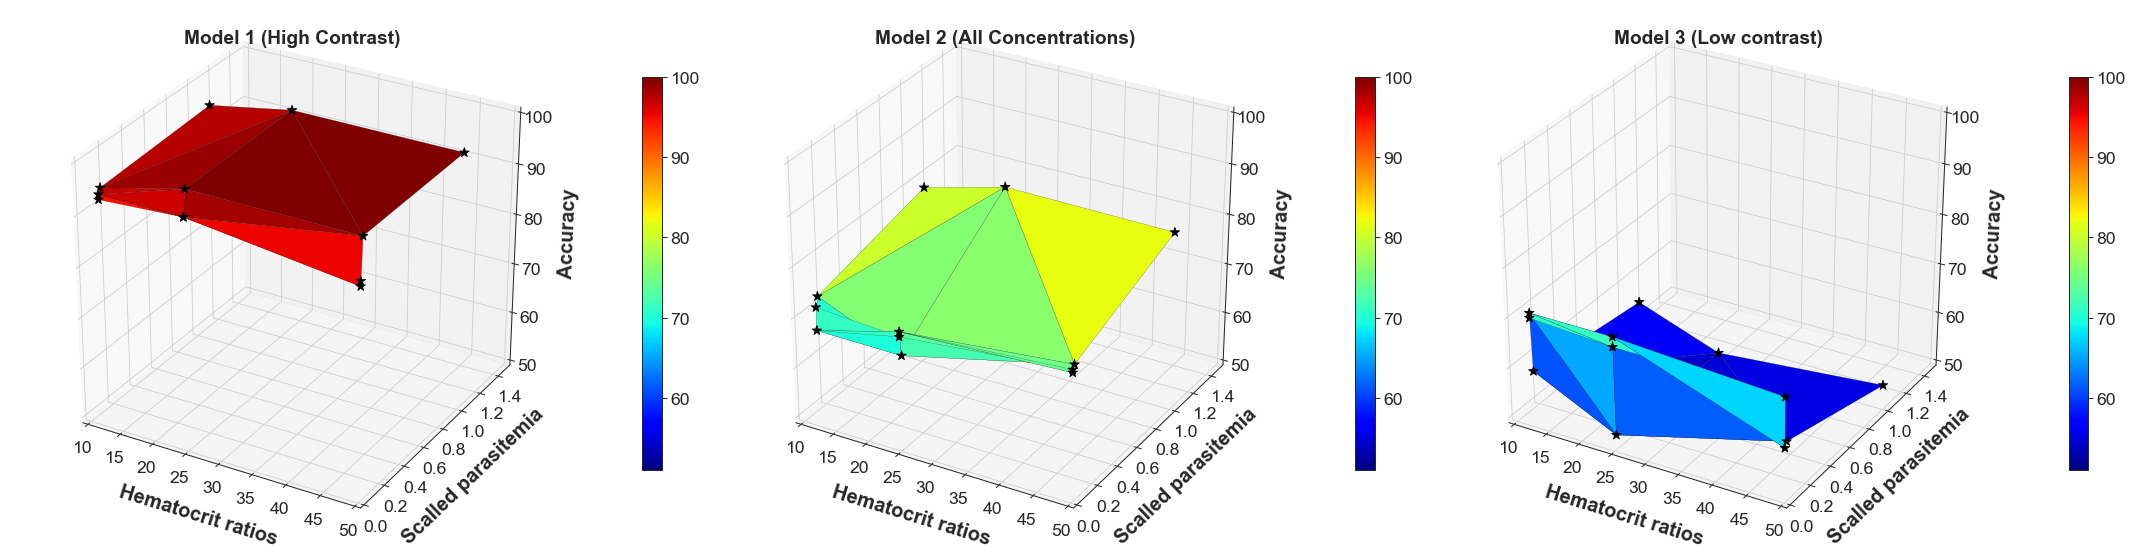

In [55]:
# Lets Draw again with scalled parasitemia

# Iterate over each model
for idx, model in enumerate(df['Model'].unique()):
    # Create a 3D subplot
    ax = fig.add_subplot(1, 3, idx + 1, projection='3d')
    
    # Filter data for the current model
    model_data = df[df['Model'] == model]

    # Plot the 3D surface with a color bar but scaled parasitemia
    surf = ax.plot_trisurf(model_data['Anemic_condition'],model_data['Scaled_Parasitemia'], model_data['Accuracy'],
                           linewidth=0.2, antialiased=True, cmap=plt.cm.jet, edgecolor='k', 
                           vmin=global_min_accuracy, vmax=global_max_accuracy)
    
    ax.scatter(model_data['Anemic_condition'], model_data['Scaled_Parasitemia'], model_data['Accuracy'], c='black', s=100, marker='*',alpha=1)
    
    # Customize the plot
    ax.set_xlabel('Hematocrit ratios', labelpad=15, weight='bold', fontsize=20)
    ax.set_ylabel('Scalled parasitemia',  labelpad=15, weight='bold', fontsize=20)
    ax.set_zlabel('Accuracy',  labelpad=15, weight='bold', fontsize=20)
    ax.set_title(model, weight='bold')
    ax.set_xlim([10, 50])
    ax.set_zlim([50, 100])
    ax.set_ylim([0, 1.5])
    # Add colorbar per each 3D
    cbar = fig.colorbar(surf, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
    cbar.set_clim(global_min_accuracy, global_max_accuracy)

plt.tight_layout()
plt.show()

# We draw a line-plots to visualize the accuracy scores as avaraged at different malaria parasitemia and anemic conditions

In [80]:
df4 = pd.read_csv("Avarage_of_All_Models_perfomance_accuracy_Sec_version.csv")
df4

,Parasitemia,Model,Accuracy,LCI,UCI
0,6%,Model 1 (High contrast),99.00,98.00,99.30
1,0.1%,Model 1 (High contrast),98.67,97.67,99.33
2,0.002%,Model 1 (High contrast),93.67,90.00,96.67
3,0.00003%,Model 1 (High contrast),93.67,90.67,96.67
4,All Positive,Model 1 (High contrast),91.67,88.00,95.00
5,Field data,Model 1 (High contrast),82.90,78.00,88.00
6,6%,Model 2 (All concentrations),83.46,79.00,88.33
7,0.1%,Model 2 (All concentrations),73.00,67.70,78.67
8,0.002%,Model 2 (All concentrations),72.07,66.67,78.00
9,0.00003%,Model 2 (All concentrations),73.47,68.00,79.00


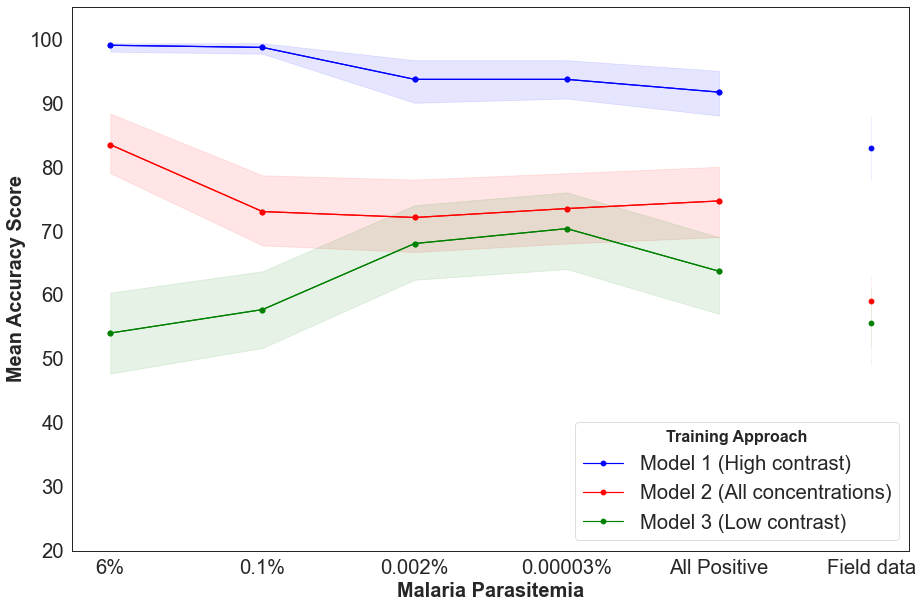

In [87]:
plt.rcParams["figure.figsize"] = [15,10], # Customize Fig size

# Lets map each model (Training approach) with unique color
color_mapping = {'Model 1 (High contrast)': 'Blue', 'Model 2 (All concentrations)': 'Red',
                 'Model 3 (Low contrast)': 'Green' }

colors = df4['Model'].map(color_mapping)

fig, ax = plt.subplots()
x = df4['Parasitemia']

# Now Iterate through each data point and plot with connecting lines based on 'Training_approach' called Model
for approach, group in df4.groupby('Model'):
    color = color_mapping[approach]
    # Plot points
    ax.plot(group['Parasitemia'][:-1], group['Accuracy'][:-1], marker='o', color=color)
    ax.fill_between(group['Parasitemia'][:-1], group['LCI'][:-1], group['UCI'][:-1], color=color, alpha=.1) #Add confidence intervals
    # Connect points with lines, excluding the last point because its for the field collections
    ax.plot(group['Parasitemia'][:-1], group['Accuracy'][:-1], marker='o', linestyle='-', color=color, label=approach)

# Then add the last points of the field collections without connecting lines
for approach, group in df4.groupby('Model'):
    color = color_mapping[approach]
    last_index = group.index[-1]
    
    ax.plot(group['Parasitemia'][last_index], group['Accuracy'][last_index], marker='o', color=color)
    ax.fill_between([group['Parasitemia'][last_index]], [group['LCI'][last_index]], [group['UCI'][last_index]], color=color, alpha=.08)

ax.set_ylim(ymin=20, ymax=105)

ax.set_xlabel('Malaria Parasitemia', weight='bold', fontsize=20)
ax.set_ylabel('Mean Accuracy Score', weight='bold', fontsize=20)
legend= ax.legend(title='Training Approach', loc= 'lower right')
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(16)
plt.show()

# Now lets draw each model (training approach) perfomance avaraged by parasitemia but separated by Anaemic conditions

In [68]:
df = pd.read_csv("All_Models_perfomance_accuracy_per_anemic_conditions.csv")
df

,Anemic_condition,Parasitemia,Model,Accuracy,LCI,UCI
0,Non_anemic,6%,Model 1 (High Contrast),100.00,NaN,NaN
1,Non_anemic,0.1%,Model 1 (High Contrast),100.00,NaN,NaN
2,Non_anemic,0.002%,Model 1 (High Contrast),91.00,87.0,95.0
3,Non_anemic,0.00003%,Model 1 (High Contrast),92.00,88.0,96.0
4,Non_anemic,All Positive,Model 1 (High Contrast),91.00,86.0,95.0
5,Moderate_Anemia,6%,Model 1 (High Contrast),100.00,NaN,NaN
6,Moderate_Anemia,0.1%,Model 1 (High Contrast),100.00,NaN,NaN
7,Moderate_Anemia,0.002%,Model 1 (High Contrast),95.00,92.0,98.0
8,Moderate_Anemia,0.00003%,Model 1 (High Contrast),95.00,92.0,97.0
9,Moderate_Anemia,All Positive,Model 1 (High Contrast),90.00,87.0,93.0


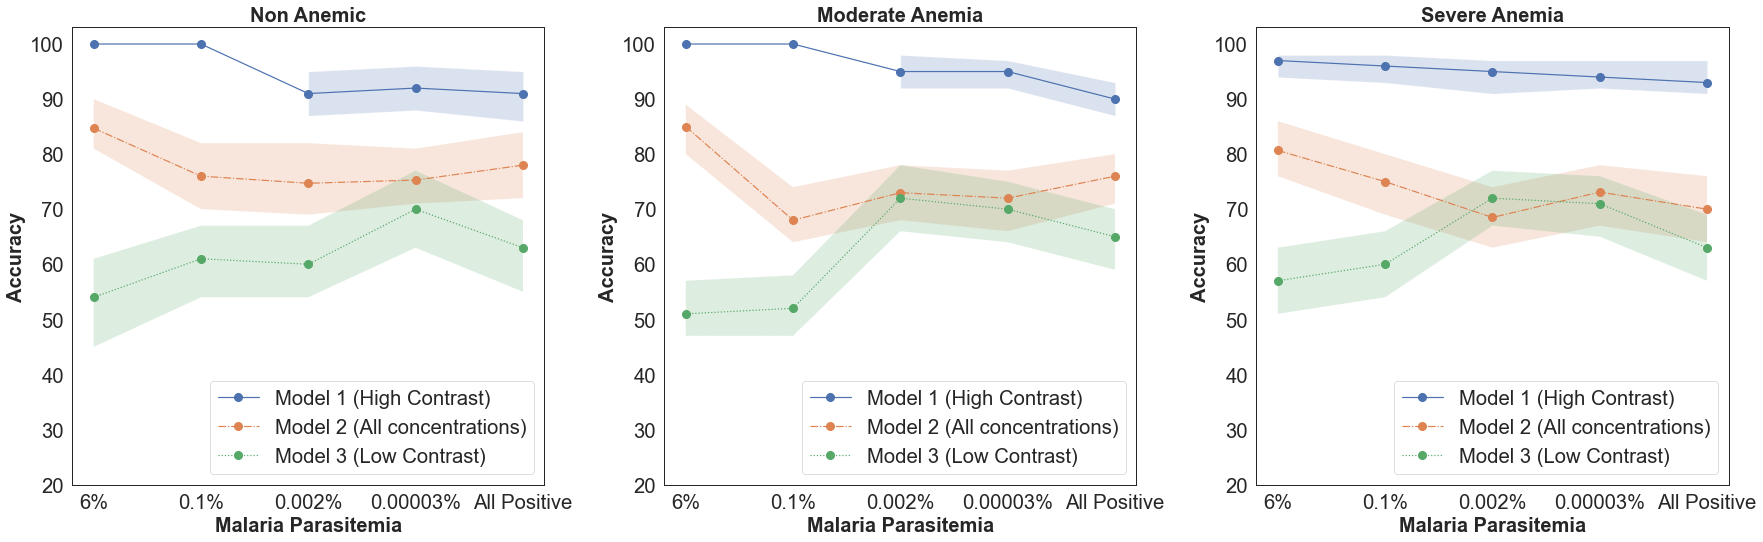

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=False) # Lets customize the figure

# Here, i have defined line styles for each model (training approaches)
line_styles = {'Model 1 (High Contrast)': '-', 
               'Model 2 (All concentrations)': '-.',
               'Model 3 (Low Contrast)': ':'}

# Defining the order of Anemic conditions
anemic_order = ['Non_anemic', 'Moderate_Anemia', 'Severe_Anemia']

# Define title of each graph
custom_titles = ['Non Anemic', 'Moderate Anemia', 'Severe Anemia']
title_fontweight = 'bold'
title_fontsize = 20

# Now lets iterate over each Anemic condition in the specified order above
for idx, anemic_condition in enumerate(anemic_order):
    ax = axes[idx]
    
    # Filter data for the current Anemic condition
    condition_data = df[df['Anemic_condition'] == anemic_condition]
    
    # Create a list to store legend items in order
    legend_items = []
    
    # I manually set the order of legend items
    legend_order = ['Model 1 (High Contrast)', 'Model 2 (All concentrations)', 'Model 3 (Low Contrast)']
    
    # Iterate over each model (training approach) in the specified order and create a line for each
    for model in legend_order:
        if model in condition_data['Model'].unique():
            model_group = condition_data[condition_data['Model'] == model]
            linestyle = line_styles.get(model, '-')
            line, = ax.plot(model_group['Parasitemia'], model_group['Accuracy'], label=model, marker='o', linestyle=linestyle, markersize=8)
            
            # Fill between LCI and UCI as confidence intervals
            ax.fill_between(model_group['Parasitemia'], model_group['LCI'], model_group['UCI'], alpha=0.2, linestyle=linestyle)
            # Add the line to the legend items list
            legend_items.append(line)
    
    # Set labels and title
    ax.set_xlabel("Malaria Parasitemia", weight='bold', fontsize=20)
    ax.set_ylabel("Accuracy", weight='bold', fontsize=20)
    ax.set_title(custom_titles[idx], fontweight=title_fontweight, fontsize=title_fontsize)
    ax.legend(handles=legend_items, loc='lower right')

plt.tight_layout()
plt.show()


# Now i am drawing the results for the False positive and False Negative,these infromations drawn from the confusion matrixes from the validation scripts

In [70]:
DF6=pd.read_csv("Model_01_positive_and_negative_distribution.csv")
DF6

,Parasitemia,Class,Score,Error
0,6%,Positive,99.33,0.67
1,6%,Negative,98.00,2.00
2,0.1%,Positive,99.00,1.00
3,0.1%,Negative,98.00,2.00
4,0.002%,Positive,96.00,4.00
5,0.002%,Negative,91.00,9.00
6,0.00003%,Positive,95.00,5.00
7,0.00003%,Negative,92.33,7.67
8,All Positive,Positive,93.33,6.67
9,All Positive,Negative,90.67,9.33


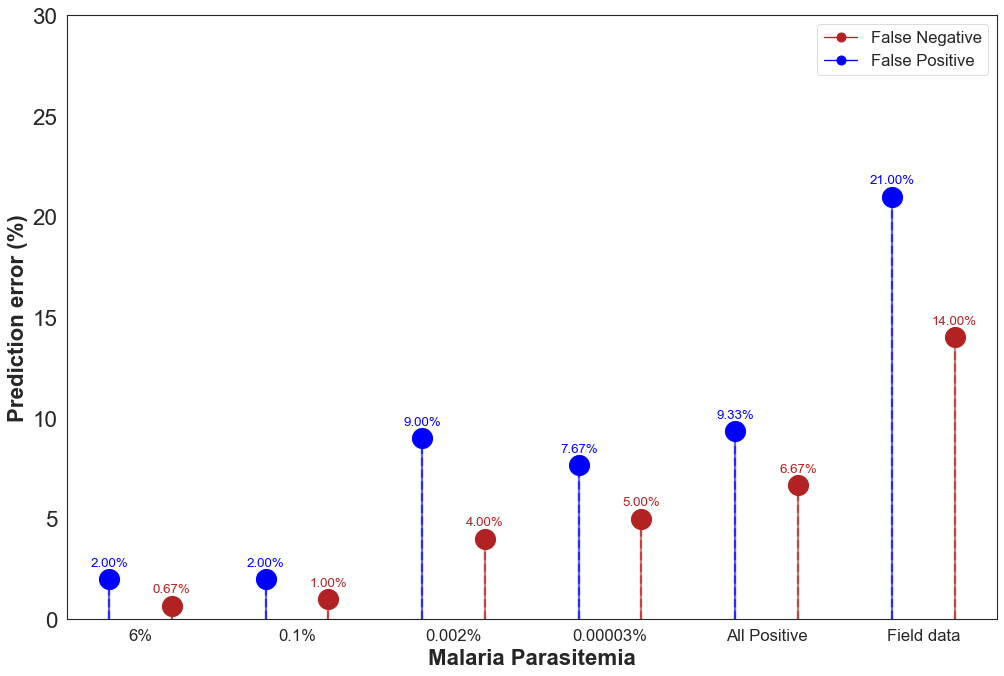

In [86]:
unique_parasitemia = df['Parasitemia'].unique() # lets set unique parasitemia values

# Then we create a dictionary to store the position of each unique parasitemia
parasitemia_positions = {parasitemia: i for i, parasitemia in enumerate(unique_parasitemia)}

fig, ax = plt.subplots(figsize=(15, 10), dpi=80) # Now, I draw lollipop plot

line_width = 2
cap_size = 8
offset = 0.2

# lets store unique classes and their corresponding colors
class_colors = {'Positive': 'firebrick', 'Negative': 'blue'}

# Iterate over parasitemia, class and errors
for i in range(len(df)):
    parasitemia = df.loc[i, 'Parasitemia']
    error = df.loc[i, 'Error']
    cls = df.loc[i, 'Class']
    
    # Now take the x-tick position from the dictionary above
    xtick_position = parasitemia_positions[parasitemia]
    
    # Separate positive and negative class
    offset_multiplier = 1 if cls == 'Positive' else -1
    offset_value = offset * offset_multiplier
    
    # Lets draw lines from 0 to the error score in each parasitemia
    ax.vlines(x=xtick_position + offset_value, ymin=0, ymax=error, color=class_colors[cls], alpha=0.6, linewidth=line_width)

    # Then add marker at the end of the line to mimic lolpop
    ax.plot(xtick_position + offset_value, error, marker='o', markersize=18, color=class_colors[cls])

    # Now, lets draw line connecting the lollipop to the zero baseline
    ax.plot([xtick_position + offset_value, xtick_position + offset_value], [0, error], color=class_colors[cls], linestyle='--', alpha=0.6, linewidth=line_width)

    # For better visualization and interpretatios, I add read-value on top of the lollipop 
    ax.text(xtick_position + offset_value, error + 0.5, f"{error:.2f}%", ha='center', va='bottom', fontsize=12, color=class_colors[cls])


ax.set_xlabel('Malaria Parasitemia', weight="bold", fontsize=20)
ax.set_ylabel('Prediction error (%)', weight="bold", fontsize=20)
ax.set_xticks(list(parasitemia_positions.values()))
ax.set_xticklabels(list(parasitemia_positions.keys()), ha="center", fontsize=15)
ax.set_ylim(0, 30)

# for the legend, lets create custom legend based on unique classes and their colors with modified labels
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label='False Negative' if cls == 'Positive' else 'False Positive', markersize=8) for cls, color in class_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', fontsize=15)

plt.show()